#### Data Collection

In [1]:
import pandas as pd

In [2]:
from tiingo import TiingoClient

config = {
    'api_key': 'adb1efaa11508f5cd2f338986d217f9360ec96c8'
}

client = TiingoClient(config)

df = client.get_dataframe("AAPL", startDate='2020-01-01')

In [3]:
df.to_csv("AAPL.csv")

In [4]:
df = pd.read_csv("AAPL.csv")

In [5]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2020-01-02 00:00:00+00:00,300.35,300.60,295.19,296.24,33911864,72.474890,72.535215,71.229774,71.483141,135647456,0.0,1.0
1,2020-01-03 00:00:00+00:00,297.43,300.58,296.50,297.15,36633878,71.770289,72.530389,71.545879,71.702725,146535512,0.0,1.0
2,2020-01-06 00:00:00+00:00,299.80,299.96,292.75,293.79,29644644,72.342174,72.380782,70.640999,70.891952,118578576,0.0,1.0
3,2020-01-07 00:00:00+00:00,298.39,300.90,297.48,299.84,27877655,72.001939,72.607605,71.782354,72.351826,111510620,0.0,1.0
4,2020-01-08 00:00:00+00:00,303.19,304.44,297.16,297.16,33090946,73.160186,73.461813,71.705138,71.705138,132363784,0.0,1.0


In [6]:
df.tail()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1489,2025-12-04 00:00:00+00:00,280.70,284.7300,278.59,284.095,43989056,280.70,284.7300,278.59,284.095,43989056,0.0,1.0
1490,2025-12-05 00:00:00+00:00,278.78,281.1400,278.05,280.540,47265845,278.78,281.1400,278.05,280.540,47265845,0.0,1.0
1491,2025-12-08 00:00:00+00:00,277.89,279.6693,276.15,278.130,36406317,277.89,279.6693,276.15,278.130,36406317,0.0,1.0
1492,2025-12-09 00:00:00+00:00,277.18,280.0300,276.92,278.160,31753410,277.18,280.0300,276.92,278.160,31753410,0.0,1.0
1493,2025-12-10 00:00:00+00:00,278.78,279.7500,276.44,277.750,33038318,278.78,279.7500,276.44,277.750,33038318,0.0,1.0


In [7]:
df1 = df.reset_index()['adjClose']

In [8]:
df1.shape

(1494,)

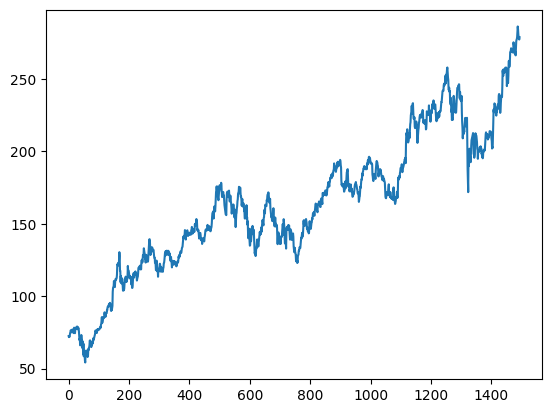

In [9]:
import matplotlib.pyplot as plt

plt.plot(df1)

Scaling the data

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1

array([[0.07849217],
       [0.07545404],
       [0.07791992],
       ...,
       [0.96421163],
       [0.96115022],
       [0.96804918]])

##### Train and Test Split

In [12]:
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size

train_data = df1[0:training_size, :]
test_data = df1[training_size:len(df1), :1]

In [13]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [14]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [15]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [16]:
X_train.shape

(870, 100, 1)

### Creating stacked LSTM

In [17]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model = Sequential()
model.add(Input(shape=(50, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

2025-12-11 22:07:05.983026: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-12-11 22:07:05.983052: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-12-11 22:07:05.983058: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-12-11 22:07:05.983076: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-11 22:07:05.983089: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=70, batch_size=64, verbose=1)

Epoch 1/70


2025-12-11 22:07:07.892811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 192ms/step - loss: 0.0220 - val_loss: 0.0433
Epoch 2/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0033 - val_loss: 0.0044
Epoch 3/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0014 - val_loss: 0.0085
Epoch 4/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0011 - val_loss: 0.0095
Epoch 5/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 8.6995e-04 - val_loss: 0.0058
Epoch 6/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 7.5072e-04 - val_loss: 0.0030
Epoch 7/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 6.9493e-04 - val_loss: 0.0021
Epoch 8/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 6.7490e-04 - val_loss: 0.0021
Epoch 9/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 6.5217e-04 - val_loss: 0.0022
Epoch 10/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 6.4619e-04 - val_loss: 0.0019
Epoch 11/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 6.4170e-04 - val_loss: 0.0018
Epoch 12/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42m

In [22]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step  
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [23]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [24]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

145.05911051166703

In [25]:
math.sqrt(mean_squared_error(y_test,test_predict))

221.84752709722756

### Plotting

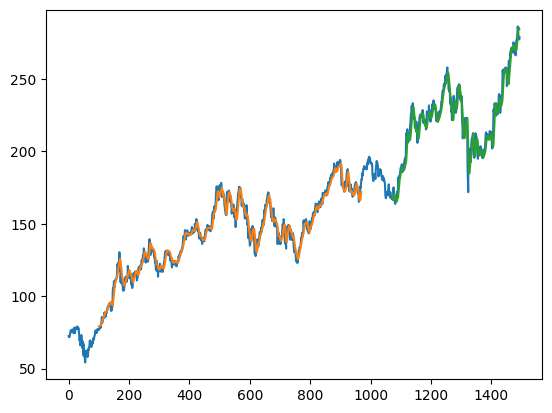

In [26]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [27]:
len(test_data)

523

In [28]:
x_input = test_data[423:].reshape(1,-1)

In [29]:
x_input.shape

(1, 100)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [31]:
temp_input

[0.688505145157451,
 0.6874294525946634,
 0.6857513721967319,
 0.6862677046271632,
 0.686999175569807,
 0.6750374742716432,
 0.6654853243140546,
 0.6591172243424727,
 0.6367858467393639,
 0.6409595338825832,
 0.6391093426747955,
 0.6835569593688003,
 0.7127297416715661,
 0.7528315604116331,
 0.7446132692322635,
 0.7552532749667309,
 0.7711055912029273,
 0.7687363591570787,
 0.7636102025479262,
 0.7605948163073243,
 0.7591732770793841,
 0.7395732665156871,
 0.7347917254768397,
 0.7471117321169762,
 0.7445271153396872,
 0.7537886587929337,
 0.7588717384553669,
 0.7677886663383083,
 0.7659794345942058,
 0.7555548135907479,
 0.7932471415984875,
 0.7988902215630981,
 0.7985025290460733,
 0.7907056017670554,
 0.7754994397251812,
 0.7429332683265943,
 0.7568901989261119,
 0.7742932852286818,
 0.7856225221041909,
 0.7918686793168354,
 0.7954871428054714,
 0.7907056017670554,
 0.8235302348433712,
 0.8691056440227053,
 0.8619979478838663,
 0.8528656352694842,
 0.8725087227799005,
 0.866434873352

In [33]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.98218507]
101
1 day input [0.68742945 0.68575137 0.6862677  0.68699918 0.67503747 0.66548532
 0.65911722 0.63678585 0.64095953 0.63910934 0.68355696 0.71272974
 0.75283156 0.74461327 0.75525327 0.77110559 0.76873636 0.7636102
 0.76059482 0.75917328 0.73957327 0.73479173 0.74711173 0.74452712
 0.75378866 0.75887174 0.76778867 0.76597943 0.75555481 0.79324714
 0.79889022 0.79850253 0.7907056  0.77549944 0.74293327 0.7568902
 0.77429329 0.78562252 0.79186868 0.79548714 0.7907056  0.82353023
 0.86910564 0.86199795 0.85286564 0.87250872 0.86643487 0.86199795
 0.86285949 0.8663918  0.87362872 0.87746257 0.87173334 0.87082872
 0.87763488 0.86031795 0.82253947 0.83283486 0.8333087  0.84007178
 0.83193024 0.85277948 0.89564104 0.89792412 0.87931488 0.88418258
 0.89813951 0.9239426  0.92476106 0.92777644 0.93509953 0.9306626
 0.92497644 0.92924106 0.92967183 0.92807798 0.92247798 0.92773337
 0.95282834 0.94515325 0.94291109 0.94058269 0.91923902 0.91915278
 0.92398206 0.91402168 0.93661578 0.

In [34]:
len(df1)

1494

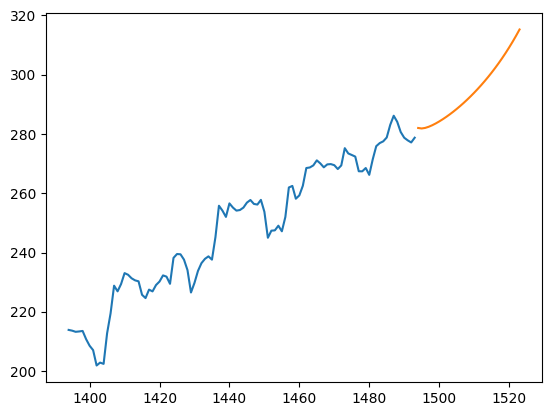

In [35]:
day_new = np.arange(len(df1)-100, len(df1))
day_pred = np.arange(len(df1), len(df1) + len(lst_output))

plt.plot(day_new,scaler.inverse_transform(df1[1394:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

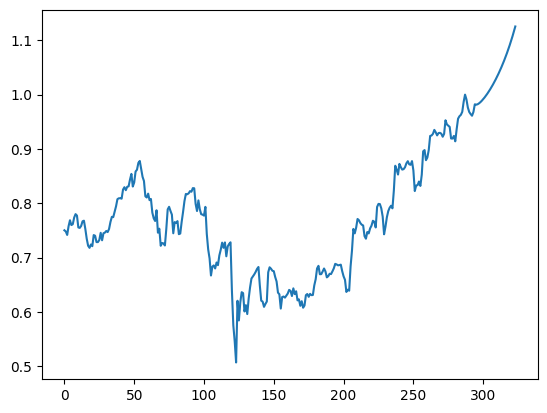

In [37]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])